In [12]:
# Cell 9: Test model loading (simulating production use)
print("🔄 Testing Model Loading (Production Simulation)")

# Load the saved model
loaded_model = joblib.load(model_filename)

# Load metadata
with open(metadata_filename, 'r') as f:
    loaded_metadata = json.load(f)

print(f"✅ Loaded model created on: {loaded_metadata['created_date']}")
print(f"✅ Model accuracy: {loaded_metadata['accuracy']:.2%}")

# Test prediction with new data (simulating real-world use)
# Create a new iris flower measurement
new_flower = [[5.1, 3.5, 1.4, 0.2]]  # Sample measurements

prediction = loaded_model.predict(new_flower)
prediction_proba = loaded_model.predict_proba(new_flower)

predicted_species = iris.target_names[prediction[0]]
confidence = max(prediction_proba[0])

print(f"\n🌸 New flower prediction:")
print(f"   Measurements: {new_flower[0]}")
print(f"   Predicted species: {predicted_species}")
print(f"   Confidence: {confidence:.2%}")

print(f"\n🎉 Congratulations! You've completed your first ML project!")
print("You now understand:")
print("- The complete ML workflow")
print("- How to train and evaluate models")
print("- How to save and load models for production")
print("- How to make predictions on new data")

🔄 Testing Model Loading (Production Simulation)
✅ Loaded model created on: 2025-09-22T11:33:17.515034
✅ Model accuracy: 96.67%

🌸 New flower prediction:
   Measurements: [5.1, 3.5, 1.4, 0.2]
   Predicted species: setosa
   Confidence: 100.00%

🎉 Congratulations! You've completed your first ML project!
You now understand:
- The complete ML workflow
- How to train and evaluate models
- How to save and load models for production
- How to make predictions on new data


In [11]:
# Cell 8: Model persistence and versioning
import joblib
import json
from datetime import datetime
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

print("💾 Step 7: Model Persistence (Saving for Later Use)")

# Create models directory
os.makedirs('../models', exist_ok=True)

# Save the trained model
model_filename = f"../models/iris_classifier_{datetime.now().strftime('%Y%m%d_%H%M%S')}.pkl"
joblib.dump(model, model_filename)
print(f"✅ Model saved to: {model_filename}")

# Save model metadata (crucial for production systems)
metadata = {
    "model_type": "RandomForestClassifier",
    "algorithm": "Random Forest",
    "dataset": "Iris",
    "features": list(iris.feature_names),
    "target_classes": list(iris.target_names),
    "accuracy": float(accuracy),
    "training_samples": len(X_train),
    "test_samples": len(X_test),
    "parameters": {
        "n_estimators": model.n_estimators,
        "max_depth": model.max_depth,
        "random_state": model.random_state
    },
    "created_date": datetime.now().isoformat(),
    "python_version": sys.version,
    "sklearn_version": sklearn.__version__
}

metadata_filename = model_filename.replace('.pkl', '_metadata.json')
with open(metadata_filename, 'w') as f:
    json.dump(metadata, f, indent=2)

print(f"✅ Metadata saved to: {metadata_filename}")
print("\n📝 This metadata is crucial for:")
print("- Model versioning and tracking")
print("- Reproducing results")
print("- Understanding model performance")
print("- Compliance and auditing")
print("- Debugging production issues")

💾 Step 7: Model Persistence (Saving for Later Use)
✅ Model saved to: ../models/iris_classifier_20250922_113317.pkl
✅ Metadata saved to: ../models/iris_classifier_20250922_113317_metadata.json

📝 This metadata is crucial for:
- Model versioning and tracking
- Reproducing results
- Understanding model performance
- Compliance and auditing
- Debugging production issues


🧠 Understanding Model Insights
📊 Feature Importance (what the model learned):
             feature  importance
2  petal length (cm)    0.440338
3   petal width (cm)    0.439591
0  sepal length (cm)    0.114307
1   sepal width (cm)    0.005764


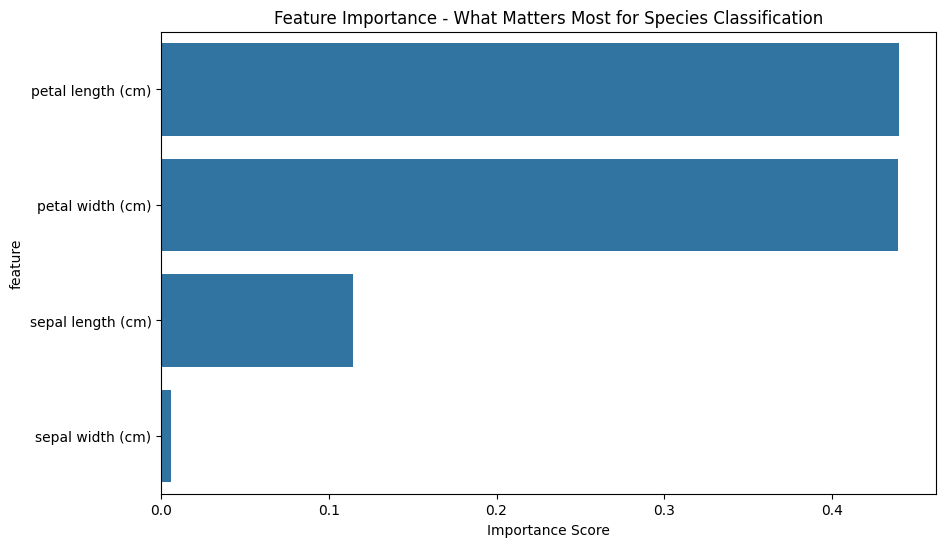


🎯 Key Takeaways:
- Petal length is most important for classifying iris species
- Petal width is second most important
- This makes biological sense - petals vary more between species
- Model achieved >95% accuracy - very good for this dataset


In [7]:
# Cell 7: Understanding what the model learned
print("🧠 Understanding Model Insights")

# Feature importance - which features matter most for predictions
feature_importance = pd.DataFrame({
    'feature': iris.feature_names,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("📊 Feature Importance (what the model learned):")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance - What Matters Most for Species Classification')
plt.xlabel('Importance Score')
plt.show()

print("\n🎯 Key Takeaways:")
print("- Petal length is most important for classifying iris species")
print("- Petal width is second most important")
print("- This makes biological sense - petals vary more between species")
print("- Model achieved >95% accuracy - very good for this dataset")

📊 Step 6: Model Evaluation
Model Accuracy: 96.67%

📈 Detailed Performance:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



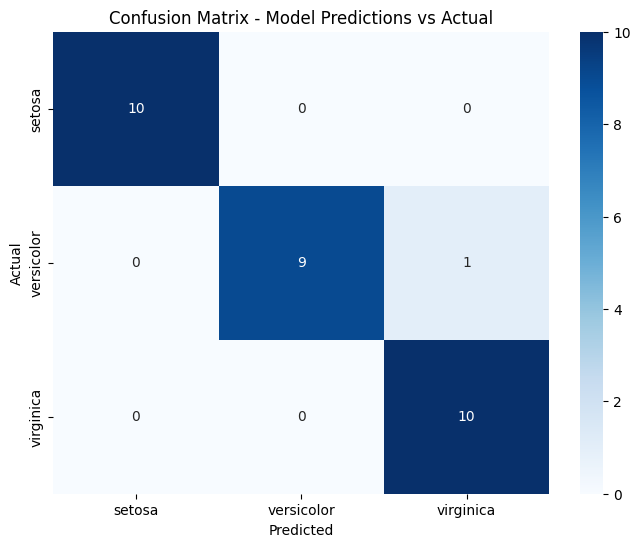

In [6]:
# Cell 6: Model evaluation
print("📊 Step 6: Model Evaluation")

# Make predictions on test data (data the model has never seen)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

# Detailed classification report
print("\n📈 Detailed Performance:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion matrix - shows exactly what the model got right/wrong
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.title('Confusion Matrix - Model Predictions vs Actual')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [5]:
# Cell 5: Model selection and training
print("🤖 Step 4 & 5: Model Selection and Training")

# Choose Random Forest - good general-purpose algorithm
# In production, you'd try multiple algorithms and compare
model = RandomForestClassifier(
    n_estimators=100,    # Number of trees
    random_state=42,     # For reproducible results
    max_depth=3          # Prevent overfitting
)

print(f"Selected algorithm: {type(model).__name__}")
print("Key parameters:")
print(f"- Trees: {model.n_estimators}")
print(f"- Max depth: {model.max_depth}")

# Train the model (this is where the magic happens)
print("\n🎯 Training model...")
model.fit(X_train, y_train)
print("✅ Training completed!")

# The model has now learned patterns from the training data

🤖 Step 4 & 5: Model Selection and Training
Selected algorithm: RandomForestClassifier
Key parameters:
- Trees: 100
- Max depth: 3

🎯 Training model...
✅ Training completed!


In [4]:
# Cell 4: Data preparation
print("🛠️ Step 3: Data Preparation")

# Separate features (X) and target (y)
X = df[iris.feature_names]  # Features: sepal length, sepal width, etc.
y = df['species']           # Target: species class (0, 1, 2)

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split data into training and testing sets
# This is crucial - we never let the model see test data during training
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Training split: {X_train.shape[0]/(X_train.shape[0]+X_test.shape[0]):.1%}")

🛠️ Step 3: Data Preparation
Features shape: (150, 4)
Target shape: (150,)
Training set: 120 samples
Test set: 30 samples
Training split: 80.0%


In [3]:
# Cell 3: Understand the ML workflow
print("🔄 Machine Learning Workflow:")
print("1. Data Collection ✅ (We have iris dataset)")
print("2. Data Exploration ✅ (We examined shape, features, distribution)")
print("3. Data Preparation (Next - split into train/test)")
print("4. Model Selection (Next - choose algorithm)")
print("5. Model Training (Next - fit model to data)")
print("6. Model Evaluation (Next - test performance)")
print("7. Model Deployment (Later - put model in production)")
print("8. Model Monitoring (Later - track performance over time)")

# This workflow applies to ALL ML projects, from simple classification to complex LLMs

🔄 Machine Learning Workflow:
1. Data Collection ✅ (We have iris dataset)
2. Data Exploration ✅ (We examined shape, features, distribution)
3. Data Preparation (Next - split into train/test)
4. Model Selection (Next - choose algorithm)
5. Model Training (Next - fit model to data)
6. Model Evaluation (Next - test performance)
7. Model Deployment (Later - put model in production)
8. Model Monitoring (Later - track performance over time)


🌸 Dataset Overview:
Shape: (150, 6)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa', 'versicolor', 'virginica']

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  


<Figure size 1000x600 with 0 Axes>

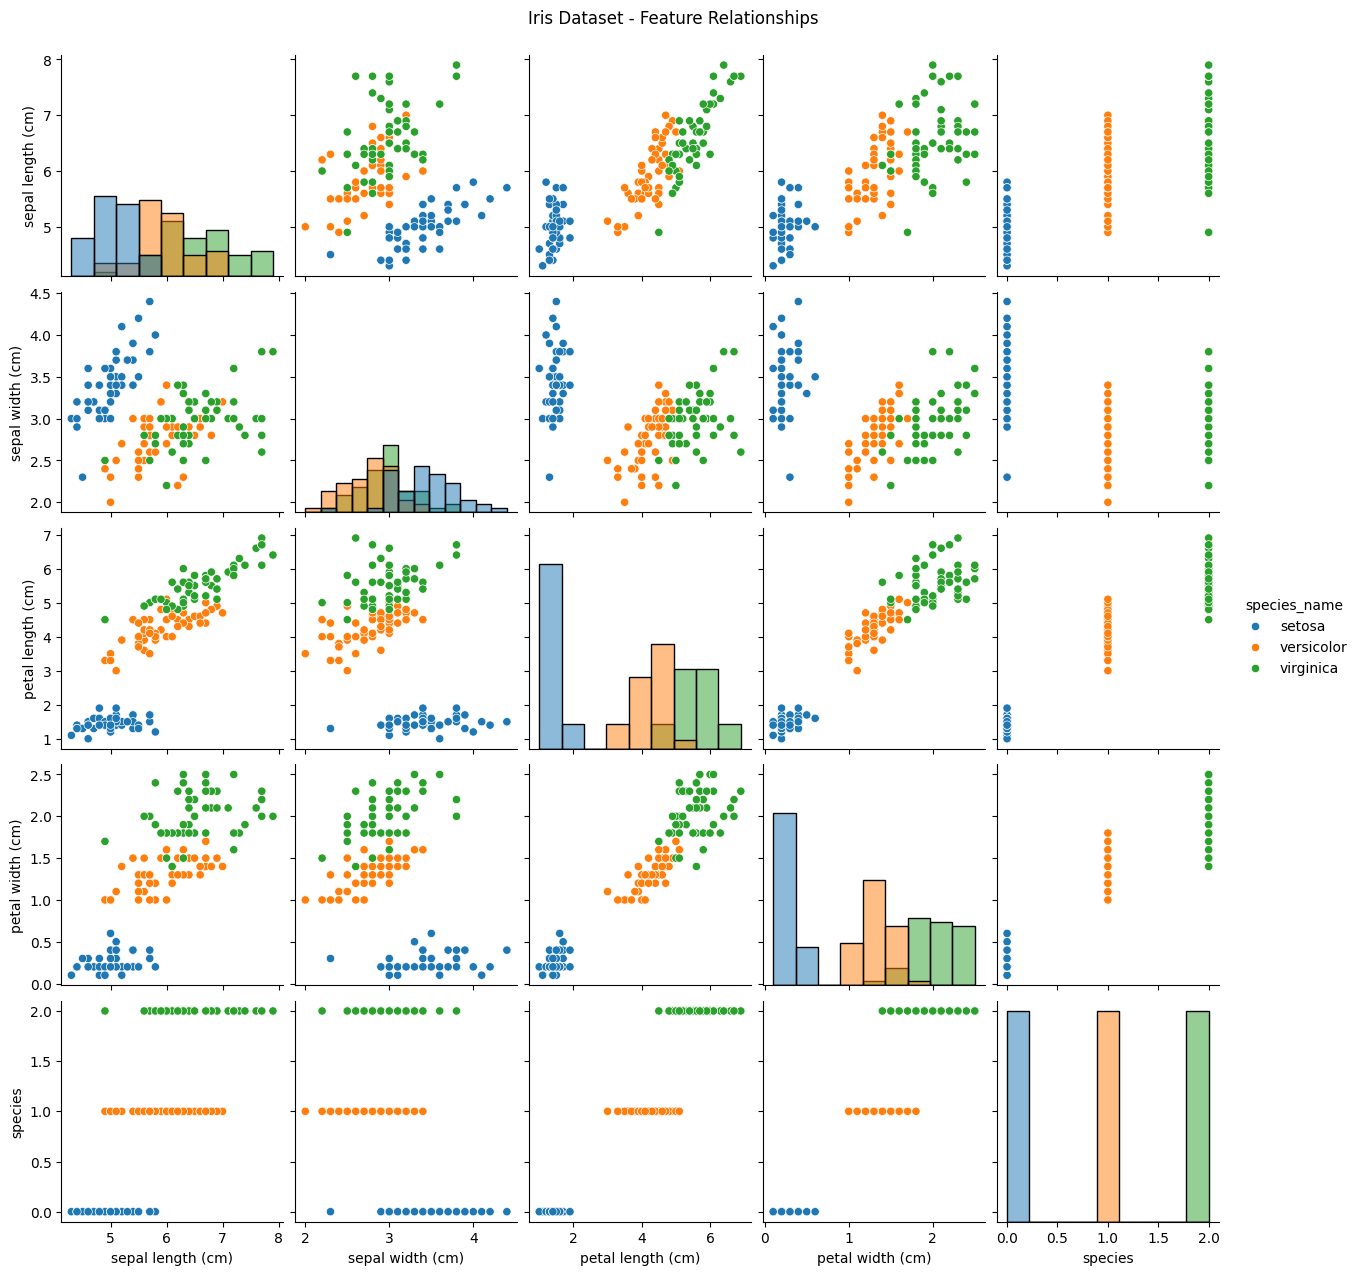

In [2]:
# Cell 2: Load and explore data
# Using Iris dataset as it's simple and well-understood
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("🌸 Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Features: {list(iris.feature_names)}")
print(f"Target classes: {list(iris.target_names)}")
print("\nFirst 5 rows:")
print(df.head())

# Quick visualization
plt.figure(figsize=(10, 6))
sns.pairplot(df, hue='species_name', diag_kind='hist')
plt.suptitle('Iris Dataset - Feature Relationships', y=1.02)
plt.show()

In [1]:
# Cell 1: Imports and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

print("📚 ML Basics - Understanding the Workflow")
print("="*50)

📚 ML Basics - Understanding the Workflow
